<a href="https://colab.research.google.com/github/trivedinush/MachineLearning/blob/master/Multivariate_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
class MyLinearRegression:
    def __init__(self, weight1=0,weight2=0, bias=40, learning_rate=0.01,
                 iterations=2000):
        self.weight1 = weight1
        self.weight2 = weight2
        self.bias = bias
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost_trend = []
        self.cost = 0

    def predict(self, xfeature, zfeature):
        predicted_set = []
        for i in range(len(xfeature)):
            predicted_value = self.weight2 * zfeature[i] + self.weight1 * xfeature[i] + self.bias
            predicted_set.append(predicted_value)
        return predicted_set

    def cost_function(self, xfeature, yfeature, zfeature):
        count = len(xfeature)
        total_error = 0.0
        for i in range(count):
            total_error += (yfeature[i] - ( self.weight2 * zfeature[i] + self.weight1 * xfeature[i] +
                            self.bias)) ** 2
        return float(total_error) / (2 * count)

    def update_weights(self, xfeature, yfeature, zfeature):
        weight_deriv1 = 0
        weight_deriv2 = 0
        bias_deriv = 0
        count = len(xfeature)

        for i in range(count):
            # Calculate partial derivatives
            # -2x(y - (mx + b))
            weight_deriv1 += -2 * xfeature[i] * (yfeature[i] -
                                                ( self.weight2 * zfeature[i] + self.weight1 * xfeature[i] +
                                                 self.bias))
            weight_deriv2 += -2 * zfeature[i] * (yfeature[i] -
                                                ( self.weight2 * zfeature[i] + self.weight1 * xfeature[i] +
                                                 self.bias))
            # -2(y - (mx + b))
            bias_deriv += -2 * (yfeature[i] - ( self.weight2 * zfeature[i] + self.weight1 * xfeature[i] +
                                self.bias))

        # We subtract because the derivatives point in direction of steepest
        # ascent
        self.weight1 -= (weight_deriv1 / count) * self.learning_rate
        self.weight2 -= (weight_deriv2 / count) * self.learning_rate
        self.bias -= (bias_deriv / count) * self.learning_rate

    def train(self, xfeature, yfeature, zfeature):
        for i in range(self.iterations):
            self.update_weights(xfeature, yfeature , zfeature)
            # Calculating cost
            self.cost = self.cost_function(xfeature, yfeature, zfeature)
            self.cost_trend.append(self.cost)
            #if i % 10000 == 0:
            print("Iteration: {}\t Weight1: {}\t Weight2: {}\t Bias: {}\t Cost: {}".
            format(i, self.weight1, self.weight2, self.bias, self.cost))

It is noted that the learning rate when increased with high iterations the model could not work properly and give monotonous result. Hence the learning rate was reduced to 0.01 and iteration's value was made 2000 (high) so that we could get a perfect line.

# New Section

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# intialise data of lists. 
data = {'Hours':[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8],
         'Subjects':[1,3,2,4,2,1,5,3,4,1,4,3,2,2,1,5,1,1,2,2,1,2,2,2,4], 
        'Scores':[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]} 
  
# Create DataFrame 
studentscores = pd.DataFrame(data) 
  
# Print the output. 
studentscores 

,Hours,Subjects,Scores
0,2.5,1,21
1,5.1,3,47
2,3.2,2,27
3,8.5,4,75
4,3.5,2,30
5,1.5,1,20
6,9.2,5,88
7,5.5,3,60
8,8.3,4,81
9,2.7,1,25


In [0]:
#from my_linear_regression import MyLinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Importing the dataset

X = studentscores.iloc[:, : 1].values
z = studentscores.iloc[:, 1:2].values
y = studentscores.iloc[:, 2].values
print(X)
print(y)
print(z)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]
[[1]
 [3]
 [2]
 [4]
 [2]
 [1]
 [5]
 [3]
 [4]
 [1]
 [4]
 [3]
 [2]
 [2]
 [1]
 [5]
 [1]
 [1]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [4]]


In [0]:
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [0]:
X_train, X_test, y_train, y_test , z_train, z_test = train_test_split(X, y, z, test_size=1/3, random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor = MyLinearRegression()
regressor.train(X_train, y_train, z_train)
print('Weight2: ' + str(regressor.weight2) + 'Weight1: ' + str(regressor.weight1) + ' Bias: ' + str(regressor.bias))

# Predicting the Test set results
y_pred = regressor.predict(X_test,z_test)


Iteration: 0	 Weight1: [2.661]	 Weight2: [1.35125]	 Bias: [40.2725]	 Cost: 150.95216741000002
Iteration: 1	 Weight1: [3.01409057]	 Weight2: [1.54133037]	 Bias: [40.18787388]	 Cost: 145.7919049629414
Iteration: 2	 Weight1: [3.06999653]	 Weight2: [1.58178845]	 Bias: [40.05771]	 Cost: 144.76212126549987
Iteration: 3	 Weight1: [3.08762187]	 Weight2: [1.60287313]	 Bias: [39.92212727]	 Cost: 143.80791293510268
Iteration: 4	 Weight1: [3.10030345]	 Weight2: [1.62135602]	 Bias: [39.78628978]	 Cost: 142.8619975376422
Iteration: 5	 Weight1: [3.11233376]	 Weight2: [1.63939718]	 Bias: [39.65086078]	 Cost: 141.9232059366094
Iteration: 6	 Weight1: [3.12426551]	 Weight2: [1.65727529]	 Bias: [39.515924]	 Cost: 140.99146553541112
Iteration: 7	 Weight1: [3.13616983]	 Weight2: [1.67502677]	 Bias: [39.38148855]	 Cost: 140.066722326879
Iteration: 8	 Weight1: [3.1480559]	 Weight2: [1.69265683]	 Bias: [39.24755396]	 Cost: 139.1489230181872
Iteration: 9	 Weight1: [3.15992487]	 Weight2: [1.71016668]	 Bias: [39.

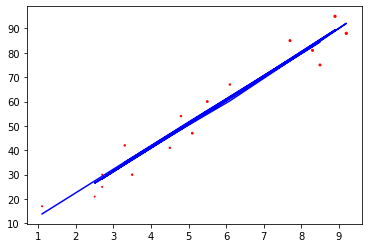

In [0]:
plt.scatter(X_train, y_train, z_train, color='red')
plt.plot(X_train, regressor.predict(X_train, z_train), color='blue')


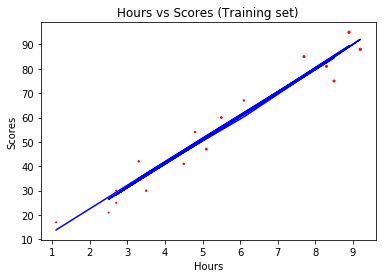

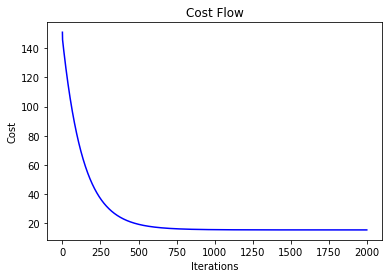

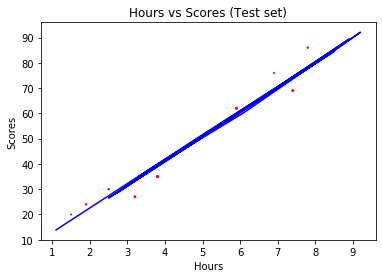

In [0]:
# Visualising the Training set results
plt.scatter(X_train, y_train, z_train, color='red')
plt.plot(X_train, regressor.predict(X_train,z_train), color='blue')
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Visualising the Test set results
plt.plot(regressor.cost_trend, color='blue')
plt.title('Cost Flow')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, z_train, color='red')
plt.plot(X_train, regressor.predict(X_train, z_train), color='blue')
plt.title('Hours vs Scores (Test set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()